In [266]:
#Importing essential libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# **Defining and solving the System of ODEs**

In [267]:
# initial condition
z0 = [0,0,0,0]

# number of time points
n = 501

# time points
t = np.linspace(0,50,n)

# store solution
x1 = np.empty_like(t)
x2 = np.empty_like(t)
x3 = np.empty_like(t)
x4 = np.empty_like(t)
# record initial conditions
x1[0] = z0[0]
x2[0] = z0[1]
x3[0] = z0[2]
x4[0] = z0[3]


In [268]:
# function that returns dz/dt
def model(z,t):
    x1 = z[0]
    x2 = z[1]
    x3 = z[2]
    x4 = z[3]
    dx1dt = (-np.exp(x1)**2)
    dx2dt = ((x2**2)-1)+x1
    dx3dt = np.sin(x3)-x2
    dx4dt = x1**3-1
    dzdt = [dx1dt,dx2dt,dx3dt,dx4dt]
    return dzdt

In [269]:
# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan)
    # store solution for plotting
    x1[i] = z[1][0]
    x2[i] = z[1][1]
    x3[i] = z[1][2]
    x4[i] = z[1][3]
    # next initial condition
    z0 = z[1]

# **plot solution of non linear function**

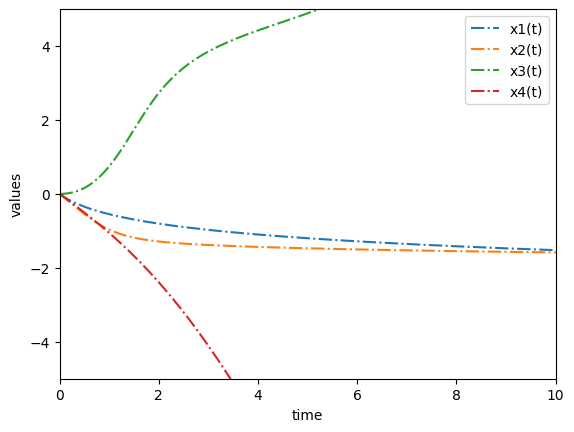

In [270]:
# plot results

plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(t,x1,'-.',label='x1(t)')
plt.plot(t,x2,'-.',label='x2(t)')
plt.plot(t,x3,'-.',label='x3(t)')
plt.plot(t,x4,'-.',label='x4(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [271]:
dataset = np.vstack((x1, x2, x3, x4)).T
x_n = dataset[0:400]
x_np1 = dataset[1:401]
vx_n = dataset[400:500]
vx_np1 = dataset[401:501]

# **Creating the Model**

In [272]:
import tensorflow as tf

# Create a Sequential model
model = tf.keras.models.Sequential()

# Add a Dense layer with 10 neurons and no activation function
model.add(tf.keras.layers.Dense(4, input_shape=(4,)))
model.add(tf.keras.layers.Dense(3, activation = 'leaky_relu'))
model.add(tf.keras.layers.Dense(3, activation = 'leaky_relu'))
model.add(tf.keras.layers.Dense(2, activation = 'leaky_relu'))

model.add(tf.keras.layers.Dense(2, activation = 'linear'))

model.add(tf.keras.layers.Dense(2, activation = 'leaky_relu'))
model.add(tf.keras.layers.Dense(3, activation = 'leaky_relu'))
model.add(tf.keras.layers.Dense(3, activation = 'leaky_relu'))
model.add(tf.keras.layers.Dense(4))

filepath = 'best_model.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, \
                             save_best_only=True, save_weights_only=False, \
                             mode='auto', save_frequency=1)
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics = ['accuracy'])
history = model.fit(x_n, x_np1, epochs = 190,steps_per_epoch =35, validation_data=(vx_n, vx_np1),  verbose = 1, callbacks=[checkpoint])



Epoch 1/190
25/35 [====================>.........] - ETA: 0s - loss: 4666.3726 - accuracy: 1.0000 
Epoch 1: val_loss improved from inf to 30310.55273, saving model to best_model.hdf5
35/35 [==============================] - 1s 10ms/step - loss: 4668.6196 - accuracy: 1.0000 - val_loss: 30310.5527 - val_accuracy: 1.0000
Epoch 2/190
29/35 [=======================>......] - ETA: 0s - loss: 4623.6880 - accuracy: 1.0000
Epoch 2: val_loss improved from 30310.55273 to 30072.89258, saving model to best_model.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 4759.9902 - accuracy: 1.0000 - val_loss: 30072.8926 - val_accuracy: 1.0000
Epoch 3/190
26/35 [=====================>........] - ETA: 0s - loss: 4588.1216 - accuracy: 1.0000
Epoch 3: val_loss improved from 30072.89258 to 29419.92969, saving model to best_model.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 4739.6270 - accuracy: 1.0000 - val_loss: 29419.9297 - val_accuracy: 1.0000
Epoch 4/190
26/35 [=========

# **Predicting using the model**

In [273]:
# Get the output
x_output = model.predict(x_n)

print("\n 5 values in Actual Output")
print(x_np1[350:355])
print("5 values in Predicted Output")
print(x_output[350:355])

13/13 [==============================] - 0s 2ms/step

 5 values in Actual Output
[[  -2.13274621   -1.76882487   45.05415017 -225.12456642]
 [  -2.13414874   -1.76922474   45.32419183 -226.19562667]
 [  -2.13554734   -1.76962338   45.600405   -227.26860077]
 [  -2.13694204   -1.77002082   45.87536755 -228.34348608]
 [  -2.13833286   -1.77041705   46.14188352 -229.42027897]]
5 values in Predicted Output
[[  -2.0799336   -1.7095134   45.396206  -224.82726  ]
 [  -2.0826702   -1.7092793   45.58887   -225.91731  ]
 [  -2.0854154   -1.7090442   45.782463  -227.01266  ]
 [  -2.088177    -1.7088094   45.976665  -228.11145  ]
 [  -2.0909379   -1.70858     46.171143  -229.21178  ]]


# **Finding the Koopman Operator**

In [274]:
m = model.layers
w = m[4].get_weights()
print("Koopman Operator:\n",w[0])

Koopman Operator:
 [[-1.4666873   0.5093602 ]
 [-0.93931884  0.00586727]]


# **Plotting the Model layers**

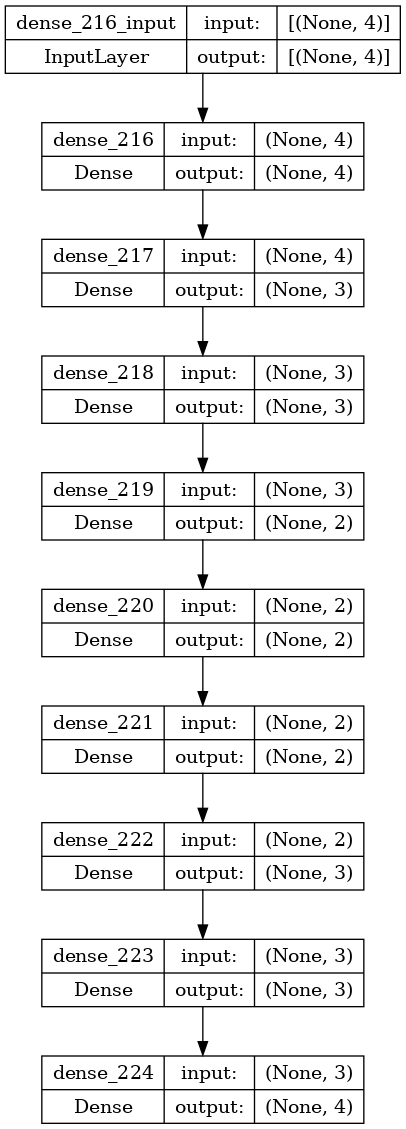

In [275]:
# This shows a pictorial representation of the model

import tensorflow as tf

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

# **Plotting the Error**

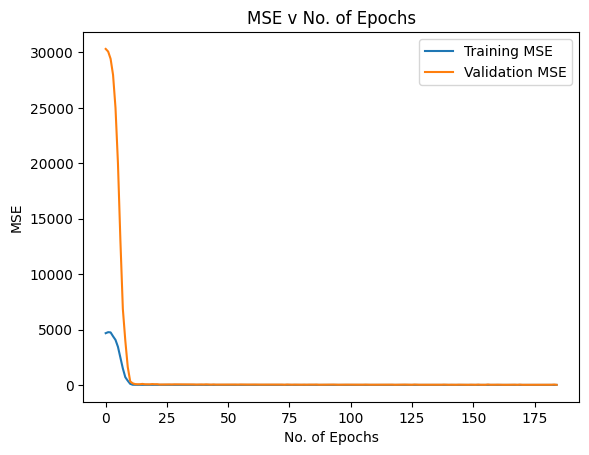

In [276]:
#Plotting the MSE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MSE v No. of Epochs')
plt.ylabel('MSE')
plt.xlabel('No. of Epochs')
plt.legend(['Training MSE','Validation MSE'])
plt.show()